In [2]:
#import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
from sklearn.linear_model import LinearRegression

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

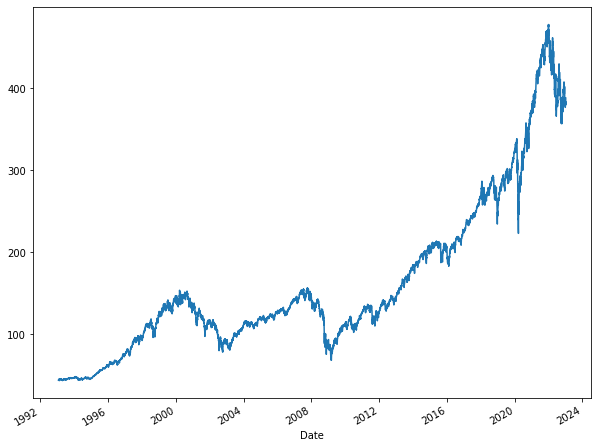

In [4]:
#Get data using SPY
data = yf.download('SPY')

#visualize the closing price data
plt.figure(figsize=(10,8))
data['Close'].plot()

The date for each closing price is included in the index of our data. Let's use Pandas'.reset index() function to simply shift the dates into their own column to make things simpler.


In [5]:
data = data.reset_index()

#Make the input data into a NumPy array and reshape it
x = np.array(data.index).reshape(-1, 1)
y = data['Close']

Now use the LinearRegression model from Scikit-learn to fit our input and  output data.

The model's predictions for each x value will be obtained using the.predict() function in order to obtain the regression line.

In [7]:
linreg = LinearRegression().fit(x, y)
predictions = linreg.predict(x)

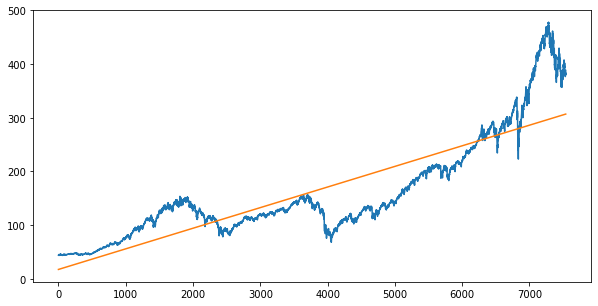

In [11]:
#plot the actual closing price data
plt.figure(figsize=(10,5))
plt.plot(data['Close'])

#plot the regression line on top of the actual price plot
plt.plot(data.index, predictions)



While the regression line in this specific example utilizing SPY is not entirely correct in exact closing price values, it does capture the overall trend of the data, as can be seen.

Let's check the coefficient of determination or the R² score using the .score() to see how our model fits the data. It ranges from 0 to 1, with a higher value indicating a better fit. R^2 is calculated as the ratio of the variance explained by the model to the total variance in the data.

In [14]:
print ('R²: ', linreg.score(x, y))

R²:  0.7356400713171274


A score of 0.74 indicates that our model performed an excellent job of describing the data's variance.

#### Limitations of the model
Simple linear regression is not the best strategy to predict stock prices (it will not make you a lot of money) since not all stocks increase linearly over time. Any random and unforeseen event will cause this linear regression model to collapse.

